# Verify synonyms and create a processed list of nameserver names

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

In [2]:
import sys
sys.path.append('../../../../inbo-pyutils/gbif/verify_synonyms/')
from verify_synonyms import verify_synonym

In [3]:
recorder_names = pd.read_table('../data/interim/recommended-nameserver-names-with-gbif-match.tsv', dtype=object)

## Verify synonyms

Set `nameMatchValidation` for `ACCEPTED`, `DOUBTFUL` and no matches.

In [4]:
recorder_names.loc[recorder_names['gbifapi_status'] == 'ACCEPTED', 'nameMatchValidation'] = 'ok'
recorder_names.loc[recorder_names['gbifapi_status'] == 'DOUBTFUL', 'nameMatchValidation'] = 'ok: DOUBTFUL'
recorder_names.loc[recorder_names['gbifapi_status'] == 'SYNONYM', 'nameMatchValidation'] = '' # Should also be done by synonym verification
recorder_names.loc[recorder_names['gbifapi_matchType'] == 'NONE', 'nameMatchValidation'] = 'no match'

Run the synonym verification:

In [5]:
recorder_names.head()

,nbn_recommendedTaxonVersionKey,nameMatchValidation,nbn_scientificName,nbn_taxonGroup,nbn_kingdom,gbifapi_kingdom,gbifapi_usageKey,gbifapi_scientificName,gbifapi_canonicalName,gbifapi_status,gbifapi_rank,gbifapi_matchType,gbifapi_note,gbifapi_acceptedKey,gbifapi_acceptedScientificName
0,NHMSYS0000456996,ok,Caylusea,bloemplant,Plantae,Plantae,7275943,Caylusea A. St.-Hil.,Caylusea,ACCEPTED,GENUS,EXACT,NaN,7275943,Caylusea A. St.-Hil.
1,NHMSYS0000900079,ok,Listrognathus mactator,insect - vliesvleugelige (Hymenoptera),Animalia,Animalia,1306714,"Listrognathus mactator (Thunberg, 1822)",Listrognathus mactator,ACCEPTED,SPECIES,EXACT,NaN,1306714,"Listrognathus mactator (Thunberg, 1822)"
2,NBNSYS0100004462,,Paratanytarsus dissimilis,insect - vlieg & mug (Diptera),Animalia,Animalia,4297556,"Paratanytarsus dissimilis (Johannsen, 1905)",Paratanytarsus dissimilis,SYNONYM,SPECIES,EXACT,NaN,1451993,"Tanytarsus dissimilis Johannsen, 1905"
3,NHMSYS0000603228,no match,Gymnodinium colymbeticum,wier,Plantae,NaN,NaN,NaN,NaN,NaN,NaN,NONE,No match because of too little confidence,NaN,NaN
4,NHMSYS0000875969,no match,Formicinae,insect - vliesvleugelige (Hymenoptera),Animalia,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN


In [6]:
recorder_names = verify_synonym(
    recorder_names,
    None,
    'https://raw.githubusercontent.com/inbo/alien-species-checklist/master/data/vocabularies/verified-synonyms.tsv', 
    usagekeycol='gbifapi_usageKey', 
    acceptedkeycol='gbifapi_acceptedKey', 
    taxonomicstatuscol='gbifapi_status', 
    outputcol='nameMatchValidation'
)

Number of verified synonyms:

In [7]:
len(recorder_names[(recorder_names['gbifapi_status'] == 'SYNONYM') & (recorder_names['nameMatchValidation'].fillna('').str.contains('^ok', regex=True))])

157

Save result back to the same file

In [8]:
recorder_names.to_csv('../data/interim/recommended-nameserver-names-with-gbif-match.tsv', sep='\t', dtype=object, index=False)

## Filter on `ok` to create processed list

In [9]:
verified_names = recorder_names[recorder_names['nameMatchValidation'].fillna('').str.contains('^ok', regex=True)]

In [10]:
len(verified_names)

98876

In [11]:
verified_names.to_csv('../data/processed/verified-recommended-nameserver-names.tsv', sep='\t', dtype=object, index=False)

## Analyze some of the GBIF matching

### Matching type

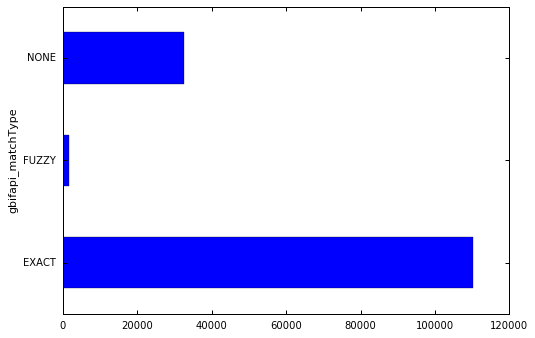

In [12]:
recorder_names.groupby(('gbifapi_matchType')).count()['nbn_recommendedTaxonVersionKey'].plot(kind='barh')

### Status

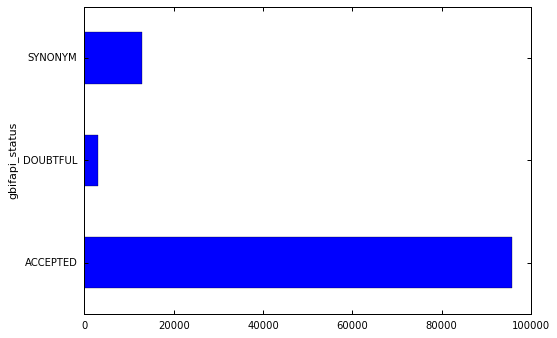

In [13]:
recorder_names.groupby(('gbifapi_status')).count()['nbn_recommendedTaxonVersionKey'].plot(kind='barh')

### nameMatchValidation

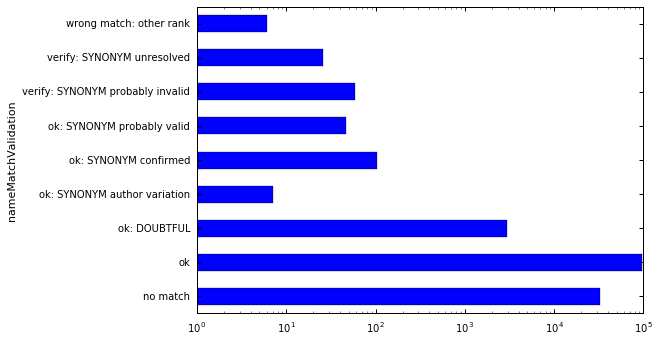

In [14]:
recorder_names.groupby(('nameMatchValidation')).count()['nbn_recommendedTaxonVersionKey'].plot(kind='barh', logx=True)